Import necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


Upload the Mnist data and print the shape and type of data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Check dataset shape and data type
print("Training set shape:", X_train_full.shape)
print("Training set dtype:", X_train_full.dtype)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Training set dtype: uint8


normalizes image data and splits the training dataset into two subsets: a validation set and a reduced training set

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


Define neural netwirk with sequentienl en 4 couches
Flatten(input_shape=[28, 28], name="InputLayer") :
Cette couche aplatie une image d'entrée de dimension (28, 28) en un vecteur unidimensionnel de longueur 784 (28 x 28).
and 2 hidden layers and output layer to produce the probabilities . loss='sparse_categorical_crossentropy' :
Utilisée pour une tâche de classification multiclasse avec des étiquettes entières (non encodées one-hot).
optimizer=SGD() :
Stochastic Gradient Descent (SGD) est utilisé pour ajuster les poids.
metrics=["accuracy"] :
La précision (accuracy) est suivie pour évaluer les performances du modèle

In [4]:
model = Sequential([
    Flatten(input_shape=[28, 28], name="InputLayer"),
    Dense(300, activation='relu', name="HiddenLayer1"),
    Dense(100, activation='relu', name="HiddenLayer2"),
    Dense(10, activation='softmax', name="OutputLayer")
])


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(),
    metrics=["accuracy"]
)

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

history, qui stocke des informations sur l'évolution des métriques pour chaque époque, à la fois pour l'ensemble d'entraînement et l'ensemble de validation.
Le modèle sera entraîné pendant 20 itérations sur l'ensemble complet des données d'entraînement.Les données de validation sont utilisées à la fin de chaque époque pour évaluer les performances du modèle sur des données jamais vues.verbose=1 Contrôle le niveau de détail affiché pendant l'entraînement.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    verbose=1
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6855 - loss: 0.9896 - val_accuracy: 0.8162 - val_loss: 0.5229
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8233 - loss: 0.5111 - val_accuracy: 0.8496 - val_loss: 0.4481
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8432 - loss: 0.4496 - val_accuracy: 0.8532 - val_loss: 0.4258
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8499 - loss: 0.4260 - val_accuracy: 0.8600 - val_loss: 0.3998
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8610 - loss: 0.3985 - val_accuracy: 0.8670 - val_loss: 0.3939
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8629 - loss: 0.3856 - val_accuracy: 0.8572 - val_loss: 0.3992
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8685 - loss: 0.3703 - val_accuracy: 0.8560 - val_loss: 0.4114
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8718 - loss: 0.3605 - 

Trianing loss and val loss courbes

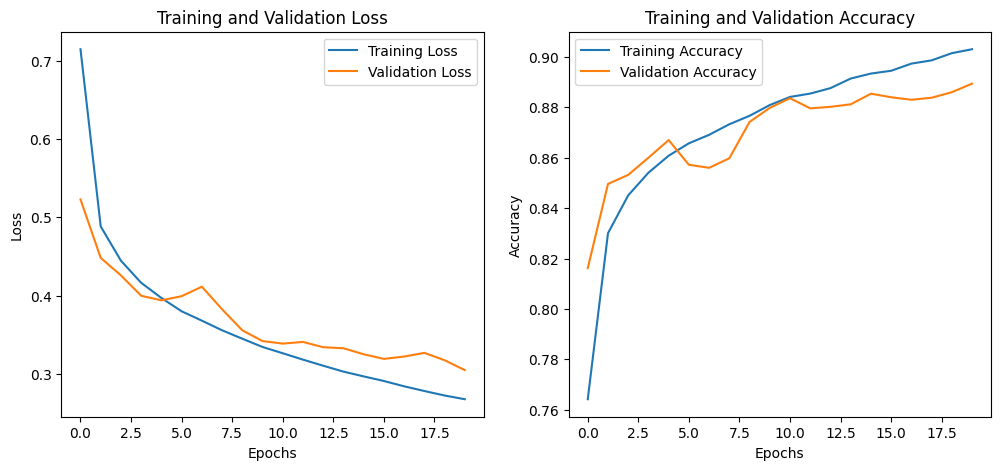

In [ ]:
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


Graphique de gauche : "Training and Validation Loss" (Perte d'entraînement et de validation)
Axe des X :

Représente les époques (le nombre d'itérations complètes sur les données d'entraînement).
Axe des Y :

Représente la valeur de la perte (loss), une mesure de l'erreur entre les prédictions du modèle et les étiquettes réelles.
Courbe bleue (Training Loss):

La perte sur l'ensemble d'entraînement diminue progressivement, ce qui montre que le modèle apprend bien les données d'entraînement.
Cette diminution constante est attendue : au fur et à mesure de l'entraînement, le modèle s'améliore à prédire les sorties correctes sur les données d'entraînement.
Courbe orange (Validation Loss):

La perte de validation diminue initialement, indiquant que le modèle généralise bien sur des données qu'il n'a pas vues.
La stabilité relative des deux courbes suggère qu'il n'y a pas d'overfitting majeur après 20 époques (l'écart entre la perte d'entraînement et de validation reste modéré).
Cependant, la légère hausse et irrégularité au début des époques (entre 5 et 10) pourraient signaler des fluctuations dues à des variations aléatoires ou au batch sampling.
Graphique de droite : "Training and Validation Accuracy" (Précision d'entraînement et de validation)
Axe des X :

Comme pour le graphique de gauche, représente les époques.
Axe des Y :

Représente la précision (accuracy), une métrique qui mesure le pourcentage de prédictions correctes.
Courbe bleue (Training Accuracy):

La précision sur l'ensemble d'entraînement augmente régulièrement avec les époques.
Cela montre que le modèle devient plus performant à prédire correctement les labels sur les données d'entraînement.
Courbe orange (Validation Accuracy):

La précision de validation suit une tendance similaire à celle de l'entraînement, atteignant un plateau autour de 88%.
Cela suggère que le modèle généralise relativement bien sur les données de validation.
Une légère oscillation est visible, ce qui est normal pour un petit nombre d'époques et peut être amélioré avec davantage d'échantillons de validation ou des techniques de régularisation.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.88


e modèle prédit les probabilités pour chaque classe pour les trois premières images du jeu de test X_test.
Le résultat, predictions, est une matrice où chaque ligne représente les probabilités associées aux classes pour une image.a fonction np.argmax sélectionne l'indice de la probabilité maximale (la classe prédite) pour chaque ligne de predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted Classes: [2 2 1]
True Classes: [9 2 1]


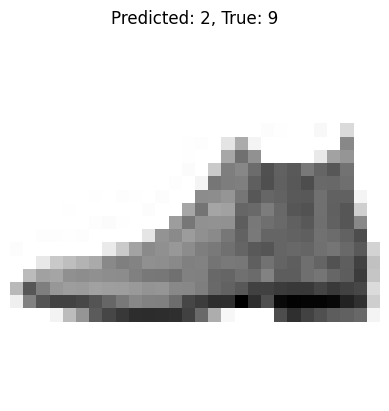

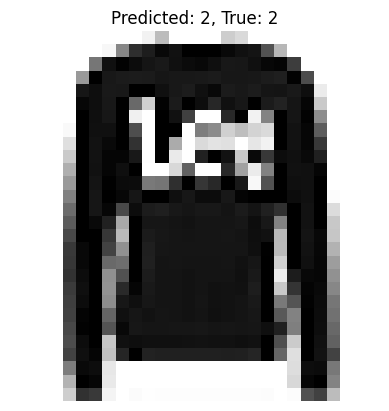

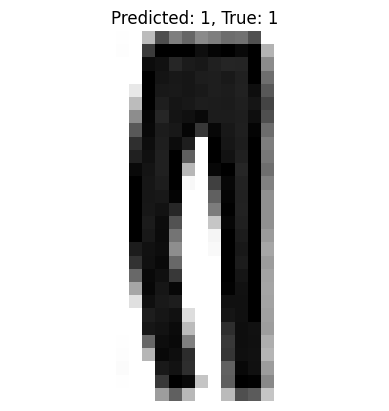

In [6]:
predictions = model.predict(X_test[:3])
predicted_classes = np.argmax(predictions, axis=1)
print(f"Predicted Classes: {predicted_classes}")
print(f"True Classes: {y_test[:3]}")

# Visualize predictions
for i in range(3):
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"Predicted: {predicted_classes[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()
